# Module 2- Plotting in Financial Markets


   ### Welcome to the Answer notebook for Module 2 ! 
Make sure that you've submitted the module 1 notebook and unlocked Module 2 yourself before you start coding here


###### Importing Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('fivethirtyeight')

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [2]:
idbi = pd.read_csv('week2.csv', index_col=['Date'], parse_dates=['Date'])

In [3]:
idbi.dtypes # all good now

Symbol                     object
Series                     object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
year                        int64
month                       int64
Product                   float64
Day_Perc_Change           float64
Trend                      object
dtype: object

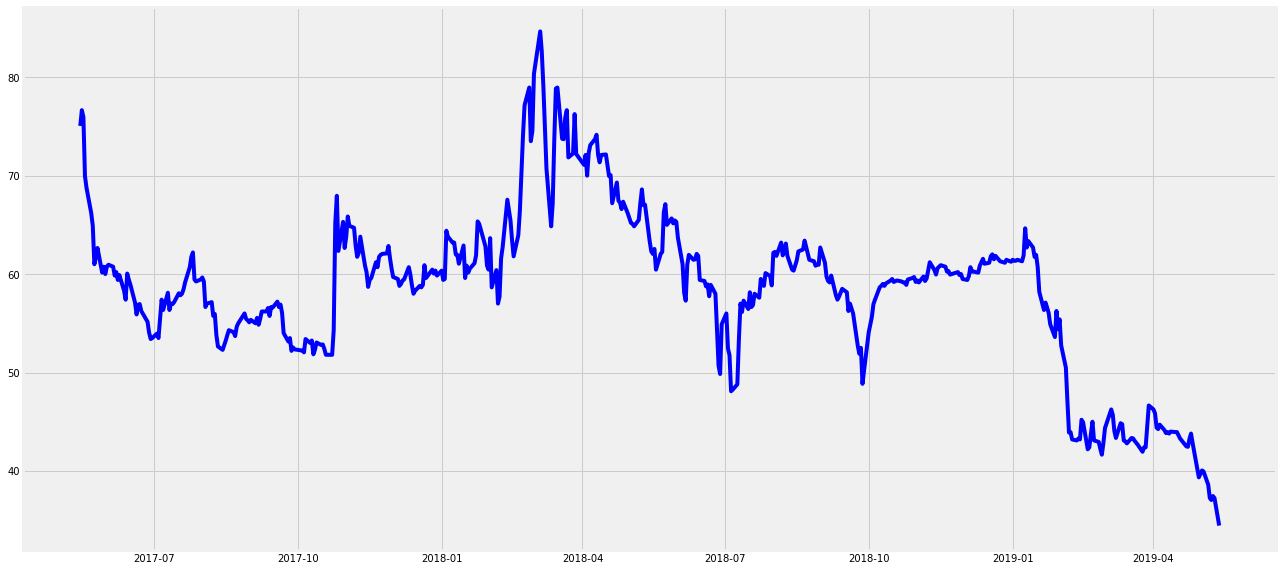

In [4]:
# date = idbi.Date.astype('O')
plt.figure(figsize=(20, 10))
plt.plot(idbi.index, idbi['Close Price'], 'b-')
plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.2
Display a stem plot of the daily change in of the stock price in percentage.
This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

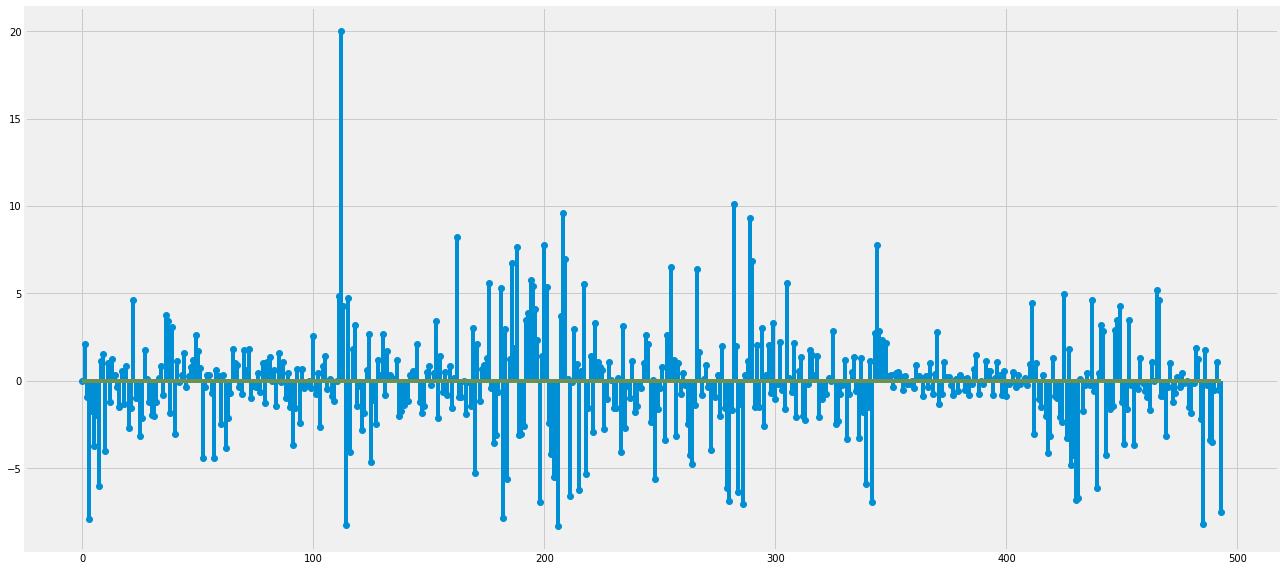

In [5]:
plt.figure(figsize=(20, 10))
plt.stem(idbi['Day_Perc_Change'])

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

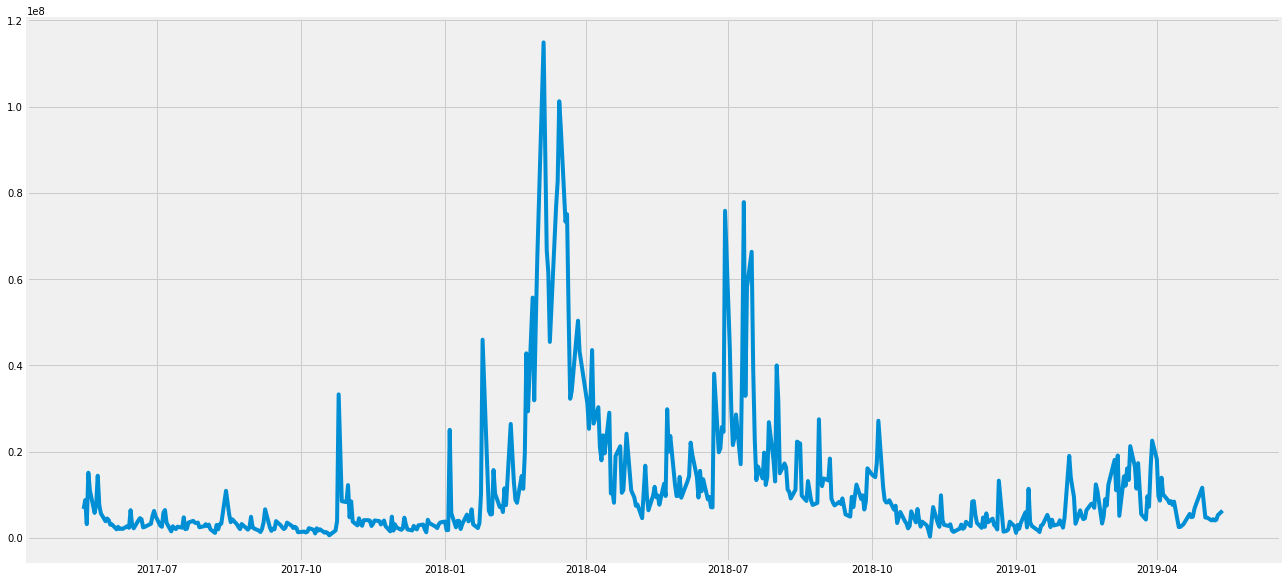

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(idbi['Total Traded Quantity'])
plt.show()

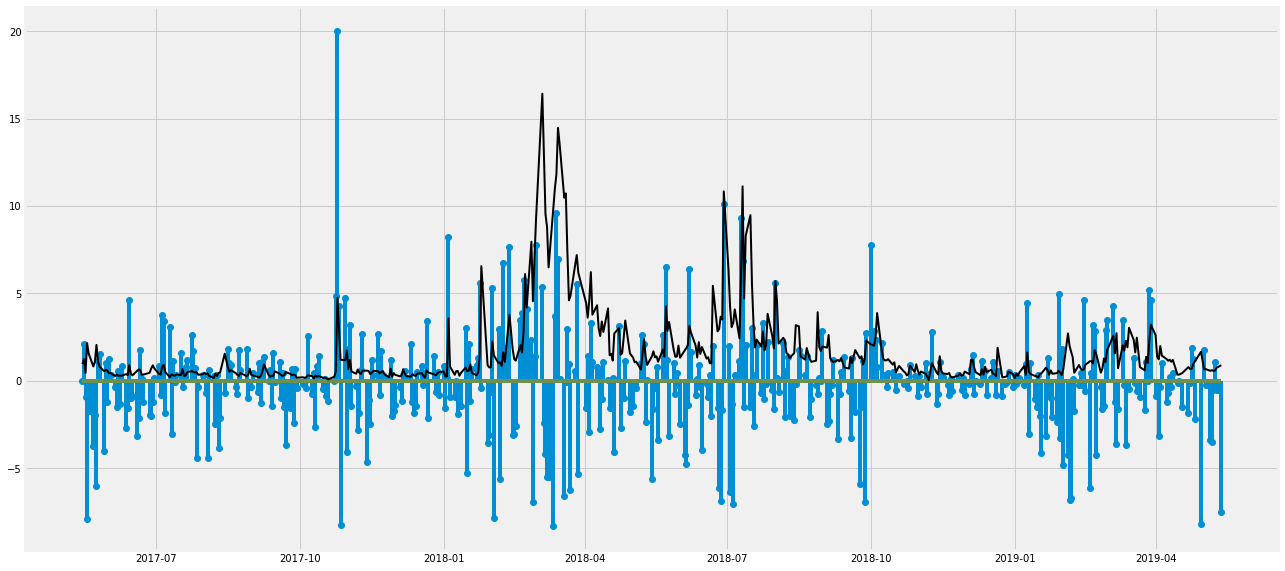

In [7]:
plt.figure(figsize=(20,10))
plt.stem(idbi.index, idbi['Day_Perc_Change'])
plt.plot(idbi.index, idbi['Total Traded Quantity']/7000000, c='k', lw = 2)
plt.show()

Whenever a big change in volumne traded is found, we can assume that percentage change will also be large.

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.4
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f695b5c9d30>],
      dtype=object)

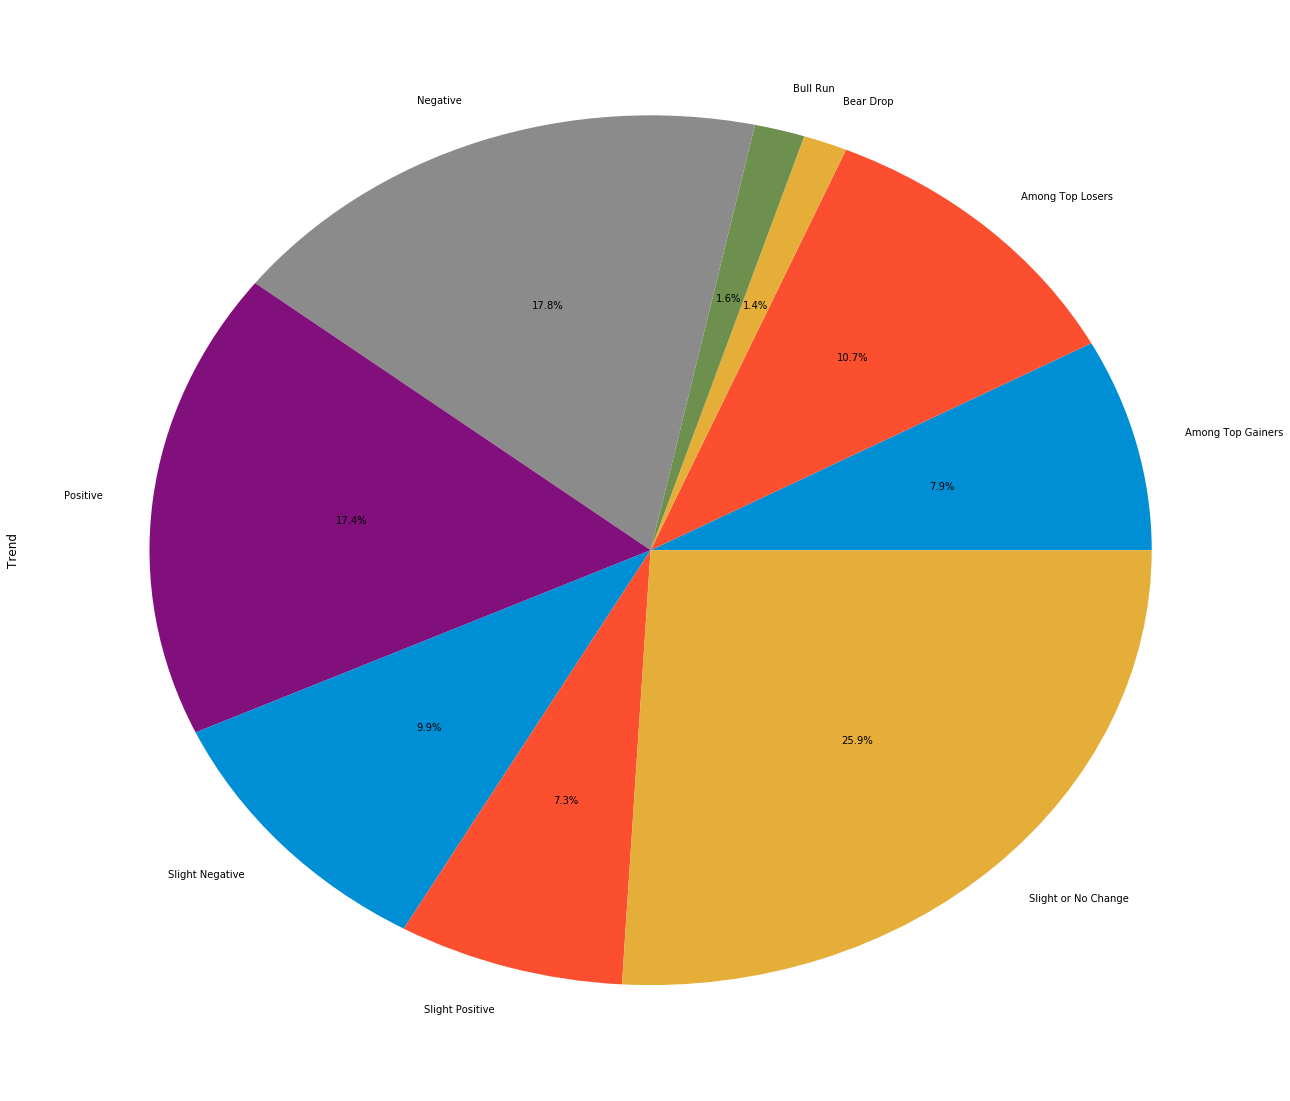

In [8]:
pie_data = idbi.groupby('Trend').Trend.count()
pie_data.plot.pie(subplots = True, figsize = (20, 20), autopct = '%1.1f%%')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6958662ba8>],
      dtype=object)

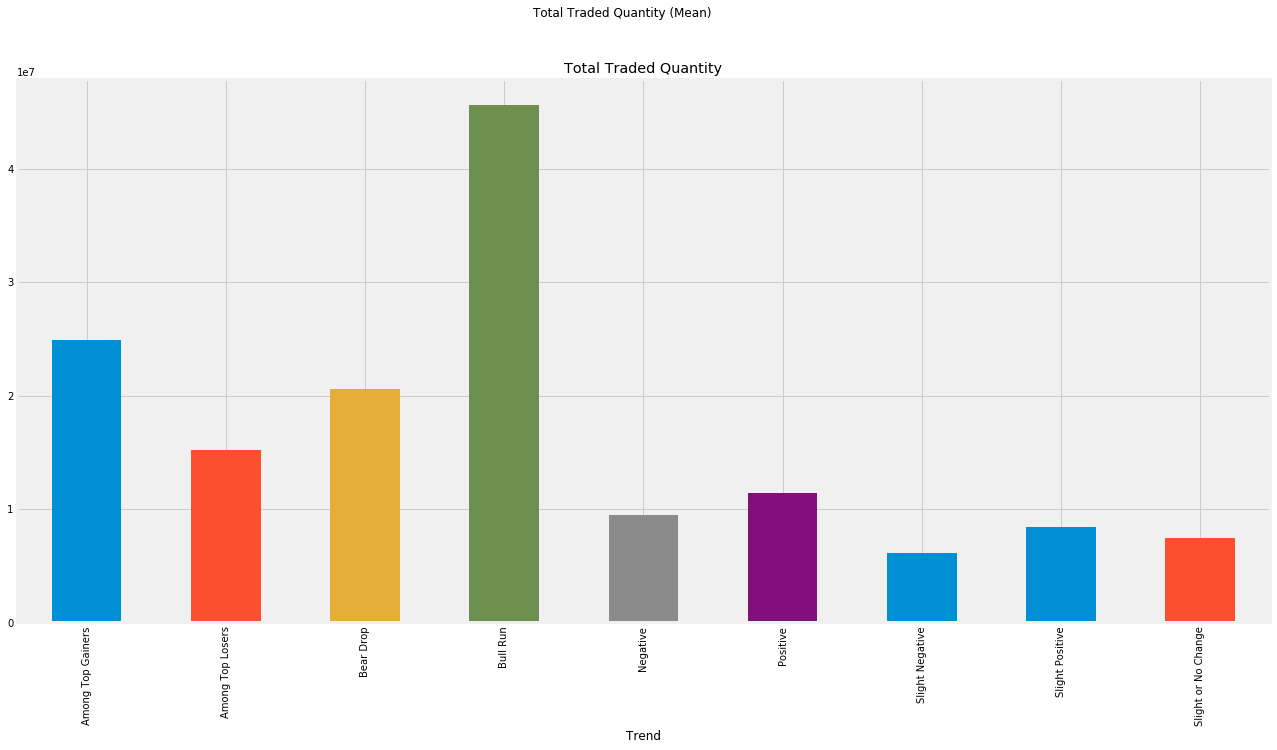

In [9]:
bar_data =  idbi.groupby('Trend')['Total Traded Quantity'].mean()
bar_data.plot.bar(subplots=True, figsize=(20, 10), title='Total Traded Quantity (Mean)')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69580db240>],
      dtype=object)

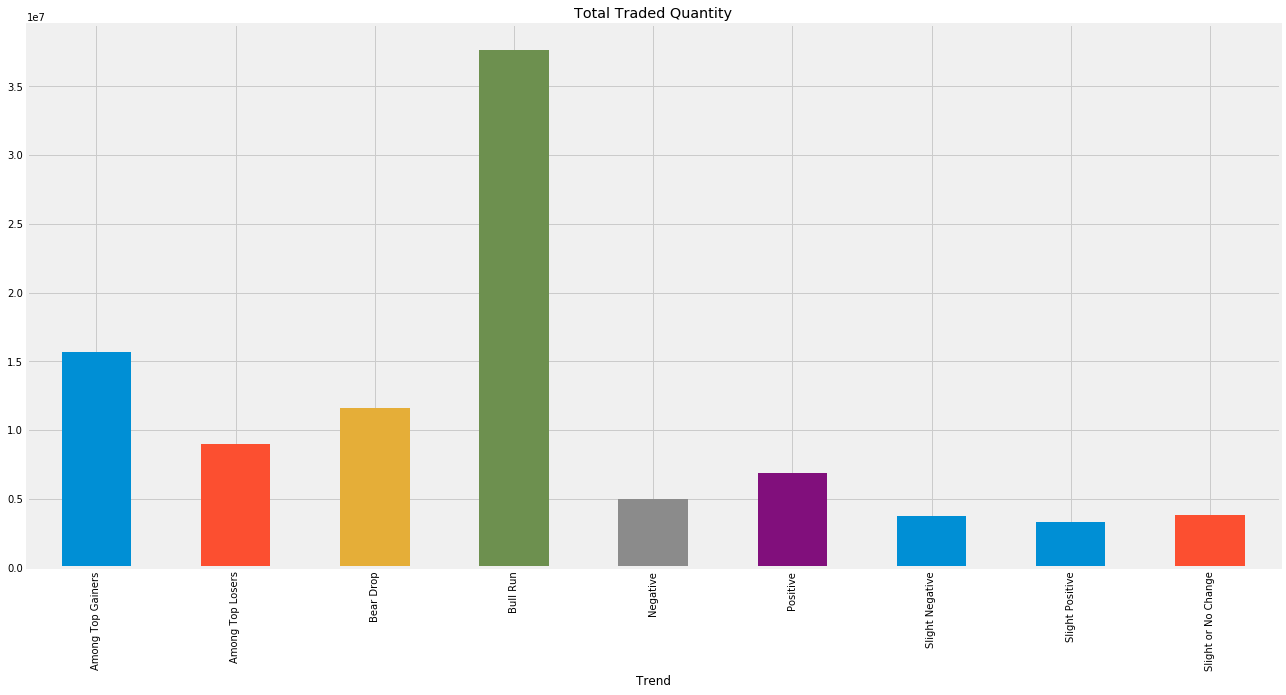

In [10]:
bar_data =  idbi.groupby('Trend')['Total Traded Quantity'].median()
bar_data.plot.bar(subplots=True, figsize=(20, 10), title='')

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.5
Plot the daily return (percentage) distribution as a histogram.

Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

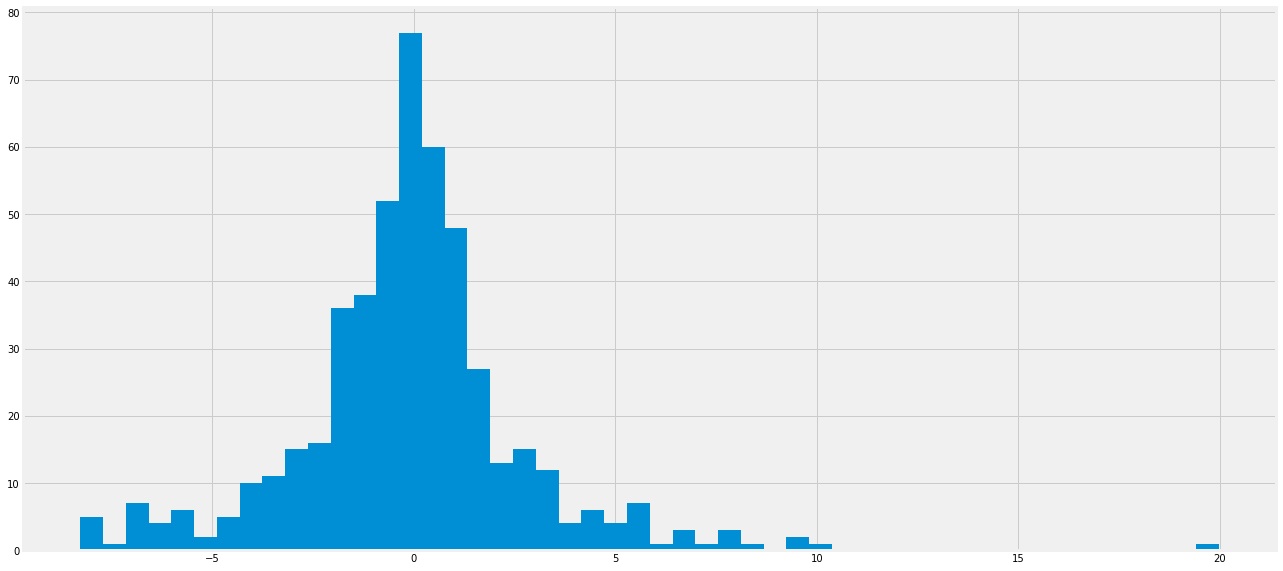

count    494.000000
mean      -0.117226
std        2.855695
min       -8.274399
25%       -1.443931
50%       -0.114488
75%        1.062238
max       19.981584
Name: Day_Perc_Change, dtype: float64


In [11]:
idbi.Day_Perc_Change.hist(bins = 50, figsize=(20, 10))
plt.show()
print(idbi.Day_Perc_Change.describe())

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 2.6
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio.

This is an extremely useful way for a fund manager to design a diversified portfolio.

In [12]:
voltas = pd.read_csv('VOLTAS.csv')
apollotyre = pd.read_csv('APOLLOTYRE.csv')
mindtree = pd.read_csv('MINDTREE.csv')
pnb = pd.read_csv('PNB.csv')
reliance = pd.read_csv('RELIANCE.csv')

In [13]:
voltas = voltas[voltas['Series'] == 'EQ']
apollotyre = apollotyre[apollotyre['Series'] == 'EQ']
mindtree = mindtree[mindtree['Series'] == 'EQ']
pnb = pnb[pnb['Series'] == 'EQ']
reliance = reliance[reliance['Series'] == 'EQ']

In [14]:
print(voltas.shape)
print(apollotyre.shape)
print(mindtree.shape)
print(pnb.shape)
print(reliance.shape)

(494, 15)
(494, 15)
(494, 15)
(494, 15)
(494, 15)


In [15]:
combined = pd.DataFrame(columns = ['voltas', 'apollotyre', 'mindtree', 'pnb', 'reliance'])

In [16]:
combined['voltas'] = voltas['Close Price']
combined['apollotyre'] = apollotyre['Close Price']
combined['mindtree'] = mindtree['Close Price']
combined['pnb'] = pnb['Close Price']
combined['reliance'] = reliance['Close Price']

In [17]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 493
Data columns (total 5 columns):
voltas        494 non-null float64
apollotyre    494 non-null float64
mindtree      494 non-null float64
pnb           494 non-null float64
reliance      493 non-null float64
dtypes: float64(5)
memory usage: 23.2 KB


In [18]:
combined['Date'] = voltas['Date'] # adding date column
combined.index = pd.DatetimeIndex(combined.Date)
combined = combined.drop(['Date'], axis = 1)

In [19]:
combined = combined.pct_change()*100
combined = combined.iloc[1:,:]
combined.replace([np.inf, -np.inf], np.nan)
combined.dropna(inplace= True, how='any', axis=0)

In [20]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 2017-05-16 to 2019-05-13
Data columns (total 5 columns):
voltas        493 non-null float64
apollotyre    493 non-null float64
mindtree      493 non-null float64
pnb           493 non-null float64
reliance      493 non-null float64
dtypes: float64(5)
memory usage: 23.1 KB


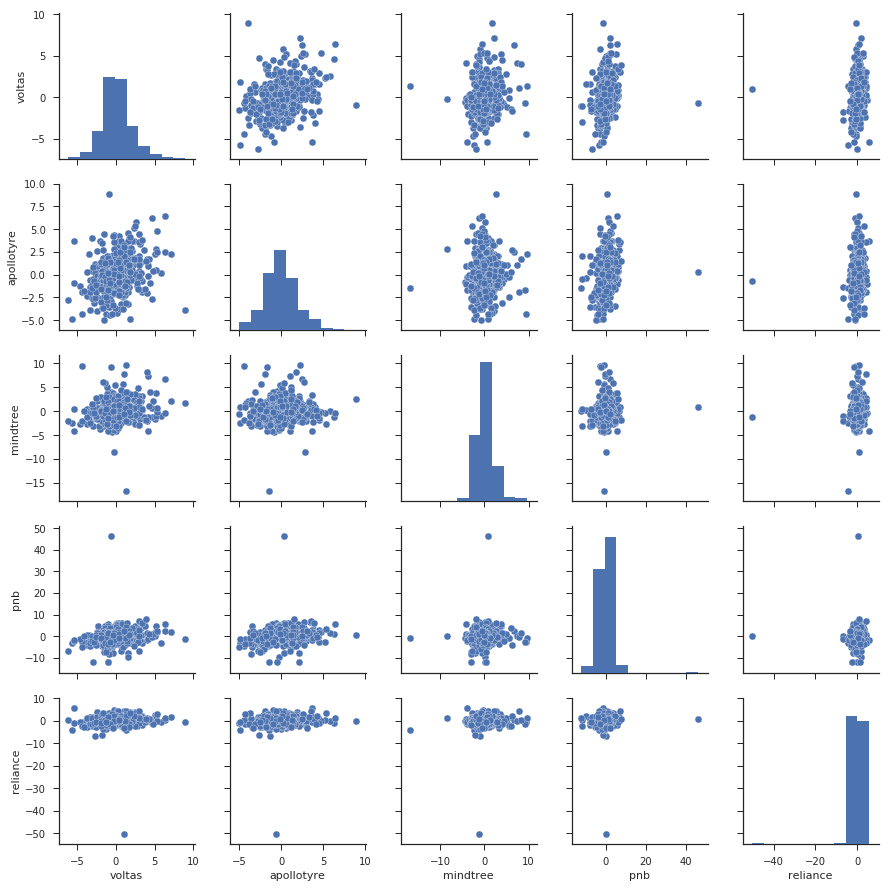

In [48]:
sns.set(style='ticks', color_codes = True)
sns.pairplot(combined)

We can also use sns.jointplot() function to get indivisua comparisons and pearsonr values. This will give a better understanding of the corelation between various stocks.

A diverse portfolio will be one where all pairs of stocks have low or close pearsonr value.

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 2.7
Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation.

Volatility is the change in variance in the returns of a stock over a specific period of time. It is common to compare the valitlity of a stock to another stock to get a feel for which may have less risk or to market index to examine the stocks volitality in overall market. Generally, the higher the volitality, the riskier the investment in that stock which results in investing in one over another

In [49]:
combined_rolling_vol = combined.rolling(7).std() * np.sqrt(7)
combined_rolling_vol.tail(4)

,voltas,apollotyre,mindtree,pnb,reliance
Date,,,,,
2019-05-08,4.090869,2.509600,2.373344,5.555257,4.163282
2019-05-09,4.111434,2.664644,1.879907,5.137442,5.016679
2019-05-10,4.494354,5.486847,1.863909,4.457348,4.796746
2019-05-13,4.553530,5.610468,1.922494,8.633634,4.665055


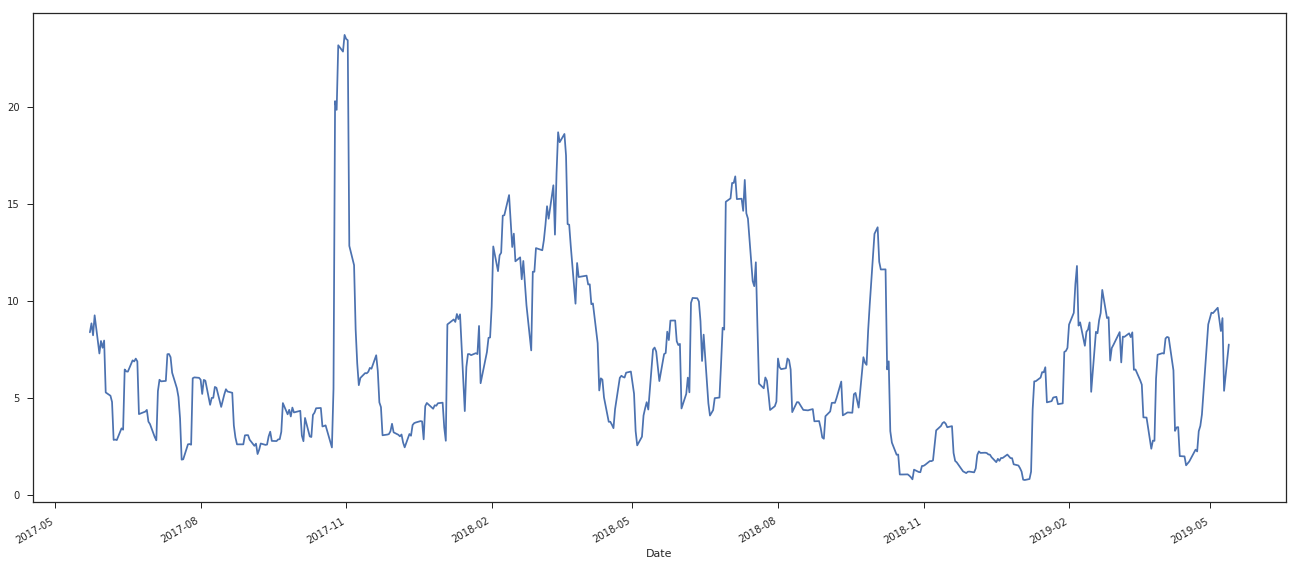

In [50]:
idbi_volitality = idbi['Day_Perc_Change'].rolling(7).std() * np.sqrt(7)
idbi_volitality.plot(figsize=(20, 10))
plt.show()

This is the plot of volitality of our IDBI stock using the exact volitality formula and a window of seven days. This is calculated using the same procedure as we did for the five random stocks we discussed previously.

However, volitality of a stock alone is nota  great indicator to analyse performance of the stock and is used for comaparison purposes than absolute purposes.

In [51]:
std_idbi = idbi_volitality.std()
print('The standard derivation of volitality of IDBI stock is ', std_idbi)

The standard derivation of volitality of IDBI stock is  4.12543650212024


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 2.8

Calculate the volatility for the Nifty index and compare the 2.

In [52]:
columns = combined.columns.values

In [53]:
nifty =  pd.read_csv('Nifty50.csv')
nifty_vol = pd.DataFrame()
nifty['Date'] =  pd.to_datetime(nifty['Date'])
nifty_vol['Volitality'] = nifty['Close']
nifty_vol['Volitality'] = nifty_vol['Volitality'].pct_change()*100
nifty_vol['Volitality'] = nifty_vol['Volitality'].rolling(7).std() * np.sqrt(7)
nifty_vol.index = nifty['Date']
nifty_vol.tail()

,Volitality
Date,
2019-05-07,1.763006
2019-05-08,1.960069
2019-05-09,1.218260
2019-05-10,1.154467
2019-05-13,1.183812


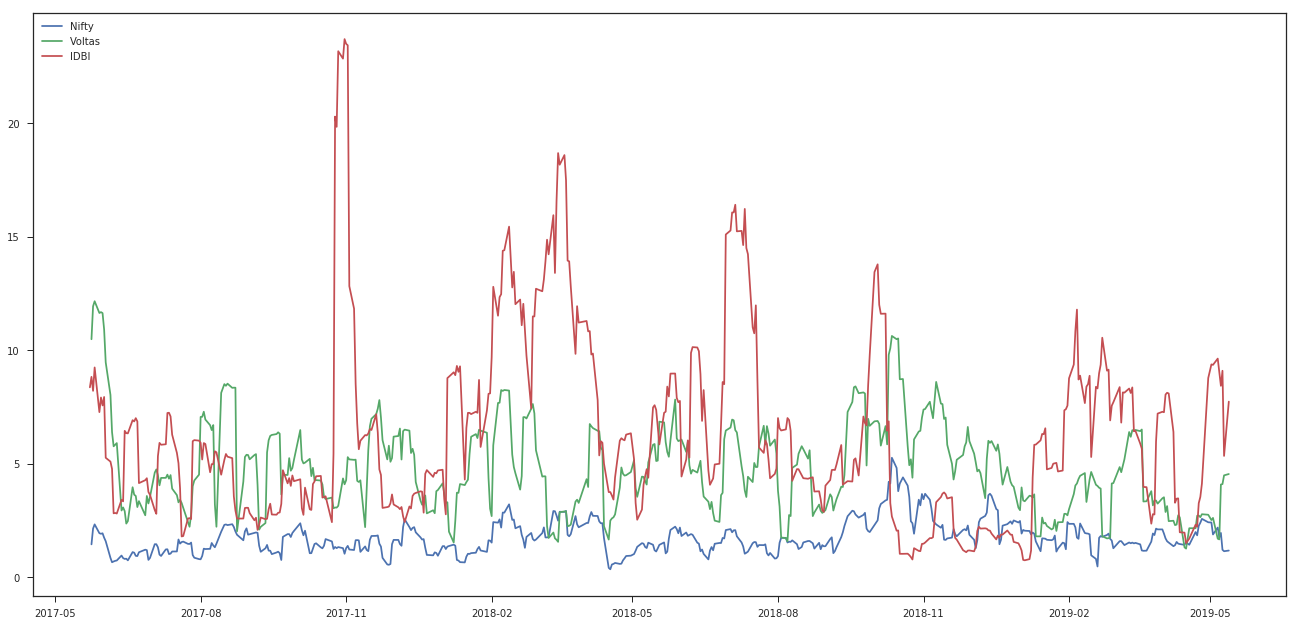

In [54]:
plt.figure(figsize=(20,10))
plt.plot(nifty_vol, label='Nifty')
plt.plot(combined_rolling_vol['voltas'], label='Voltas')
plt.plot(idbi_volitality, label='IDBI')
plt.legend(loc='upper left')
plt.show()

This is the volitality comparison of Nifty Index, Voltas and IDBI, the main stock I have to analyse for this project.

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 2.9
Trade Calls - Using Simple Moving Averages.

Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 

Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 

One of the most widely used technical indicators.

In [55]:
signals = pd.DataFrame(index=idbi.index)
signals['signal'] = 0.0
signals['21_SMA'] = idbi['Close Price'].rolling(window=21, min_periods=1).sum()/21
signals['34_SMA'] = idbi['Close Price'].rolling(window=34, min_periods=1).sum()/34

signals['signal'][21:] = np.where(signals['21_SMA'][21:] > signals['34_SMA'][21:], 1.0, 0.0)

signals['positions'] = signals['signal'].diff()

print(signals)

            signal     21_SMA     34_SMA  positions
Date                                               
2017-05-15     0.0   3.573810   2.207353        NaN
2017-05-16     0.0   7.223810   4.461765        0.0
2017-05-17     0.0  10.840476   6.695588        0.0
2017-05-18     0.0  14.171429   8.752941        0.0
2017-05-19     0.0  17.445238  10.775000        0.0
2017-05-22     0.0  20.597619  12.722059        0.0
2017-05-23     0.0  23.688095  14.630882        0.0
2017-05-24     0.0  26.592857  16.425000        0.0
2017-05-25     0.0  29.530952  18.239706        0.0
2017-05-26     0.0  32.514286  20.082353        0.0
2017-05-29     0.0  35.378571  21.851471        0.0
2017-05-30     0.0  38.271429  23.638235        0.0
2017-05-31     0.0  41.128571  25.402941        0.0
2017-06-01     0.0  44.021429  27.189706        0.0
2017-06-02     0.0  46.923810  28.982353        0.0
2017-06-05     0.0  49.816667  30.769118        0.0
2017-06-06     0.0  52.666667  32.529412        0.0
2017-06-07  

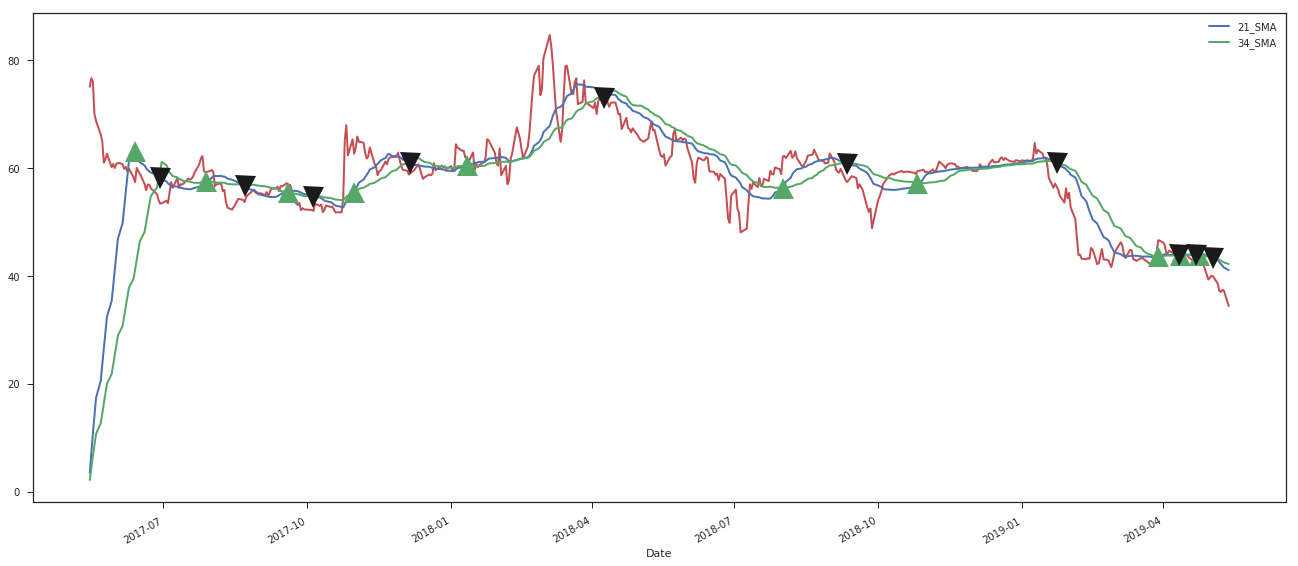

In [56]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111, label = 'Price in rupees')
idbi['Close Price'].plot(ax = ax1, color='r', lw=2)
signals[['21_SMA', '34_SMA']].plot(ax = ax1, lw=2)
ax1.plot(signals.loc[signals.positions==1.0].index,
        signals['21_SMA'][signals.positions == 1.0],
        '^', markersize=21, color='g')
ax1.plot(signals.loc[signals.positions==-1].index,
        signals['21_SMA'][signals.positions ==-1],
        'v', markersize=21, color='k')
plt.show()

Though the graph is somewhat confusing, we can clearly see the trend of buy and sell from October, 2017 to March, 2019. This figure shows the ideal path which if we have followed would have given maximum profit.

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.10
Trade Calls - Using Bollinger Bands

Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average. 

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 

Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 

Save to a new csv file. 

Useful link to study about Bolinger Bands -
https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

In [57]:
def bbands(price, length=14, numsd=2):
    ave = price.rolling(length).mean()
    sd  = price.rolling(length).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave, 3), np.round(upband, 3), np.round(dnband, 3)

idbi['ave'], idbi['upper'], idbi['lower'] = bbands(idbi['Close Price'])

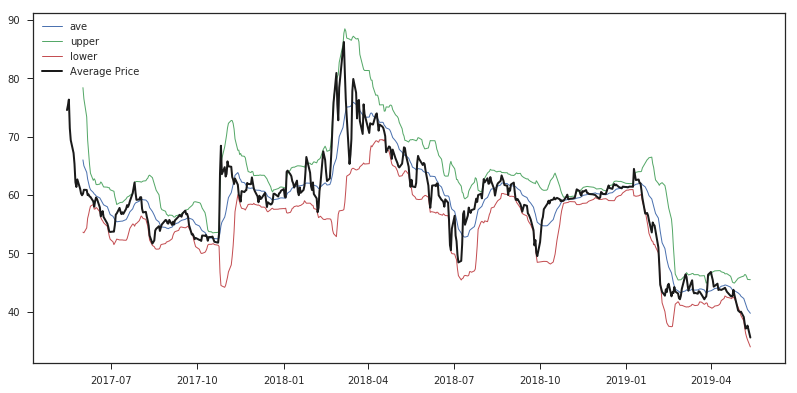

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(idbi['ave'], lw = 1)
plt.plot(idbi['upper'], lw = 1)
plt.plot(idbi['lower'], lw = 1)
plt.plot(idbi['Average Price'], color = 'k' ,lw = 2)
plt.legend(loc = 'upper left')
plt.show()

Bollinger bands are based on probability. The upper and lower bands are two standard deviations away from our mean. That means there is a 95 % probability that the price remains between upper and lower bands. That means whenever price touches the band, there is a 95% probability that the price will come back. However, bollinger bands are found not being good whenever there re drastic changes in the market. They work their best when there is small change or sideways market.

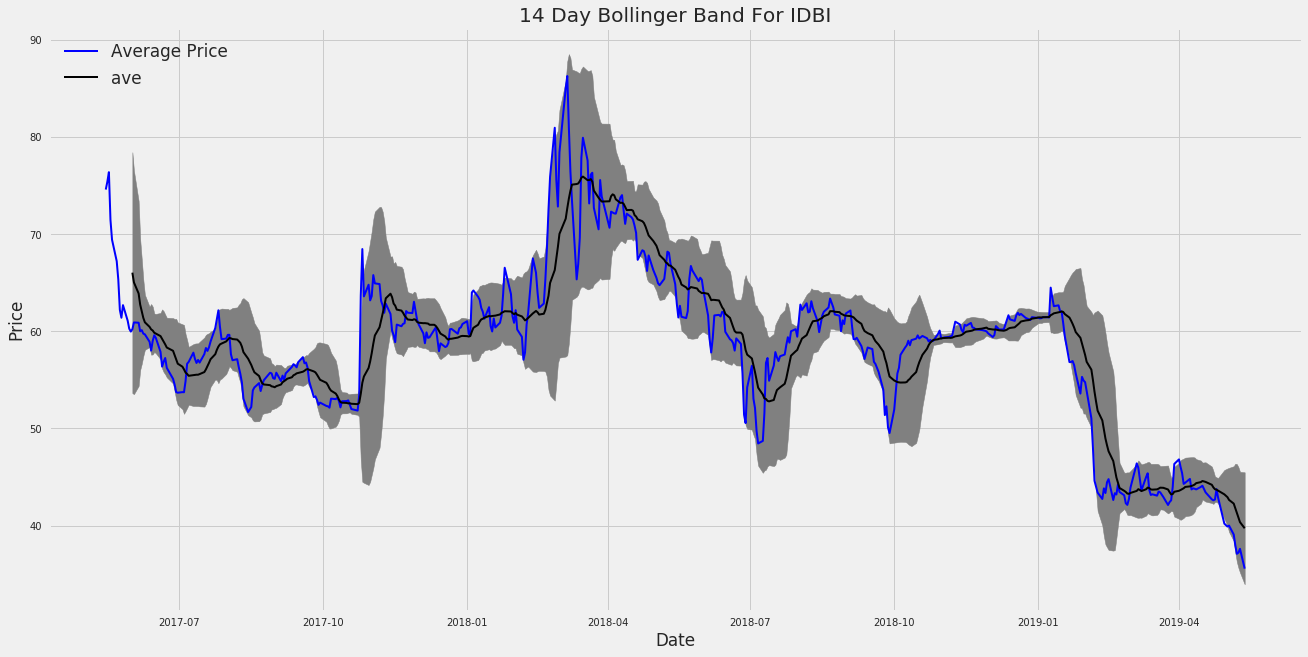

In [59]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
x_axis = idbi.index.get_level_values(0)
ax.fill_between(x_axis, idbi['upper'], idbi['lower'], color='grey')

ax.plot(x_axis, idbi['Average Price'], color='blue', lw=2)
ax.plot(x_axis, idbi['ave'], color='black', lw=2)

ax.set_title('14 Day Bollinger Band For IDBI')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc=2, fontsize='large')

plt.show()

And since the script was working fine, this is a more readable and better looking plot.

###### Saving file for next module

In [60]:
print(idbi.columns)

Index(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'year', 'month', 'Product', 'Day_Perc_Change',
       'Trend', 'ave', 'upper', 'lower'],
      dtype='object')


In [61]:
idbi.to_csv('week3.csv')

Making Bollinger bands column for Voltas in voltas dataframe and saving the file as csv for week 4.

In [62]:
voltas['ave'], voltas['upper'], voltas['lower'] = bbands(voltas['Close Price'])
print(voltas.columns)

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'ave', 'upper', 'lower'],
      dtype='object')


In [63]:
voltas.to_csv('week3_voltas.csv')